In [40]:
import pandas as pd
import nltk
import numpy as np
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from nltk.corpus import stopwords
import string
# from langdetect import detect
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
df = pd.read_csv("data\df_limpio.csv")

In [5]:
len(df)

6871

Nos quedamos solo con las reviews y la url como identificador

In [6]:
df = df[["url", "review_0", "review_1"]]

In [7]:
df.isnull().sum()

url            0
review_0    1202
review_1    1774
dtype: int64

Eliminamos las filas que no tengan ninguna review

In [8]:
df.dropna(subset=['review_0'], inplace=True)

In [9]:
df.head()

,url,review_0,review_1
0,/Restaurant_Review-g312741-d26322909-Reviews-C...,"Amazing, highly recommend this experience!!!!",Cooking with Johnathon
1,/Restaurant_Review-g312741-d15325004-Reviews-F...,I took my wife and two grown up children for d...,A great evening.
2,/Restaurant_Review-g312741-d8696562-Reviews-Ar...,We found the Argentine Experience to be exactl...,The ￹steak￻ was beyond delicious and the...
3,/Restaurant_Review-g312741-d25279370-Reviews-F...,Experiencia Inmersiva Excelente,Amazing place great service
4,/Restaurant_Review-g312741-d25198242-Reviews-I...,My husband had the cantelonni stuffed with ￹la...,Great food and ￹nice￻ food place


Por hacer: detección de lenguaje

In [10]:
def detect_language(text):
    try:
        language = detect(text)
        return language
    except Exception as e:
        print(f"Error al detectar el idioma: {e}")
        return "No detectado"

In [11]:
# df["review_0"] = df["review_0"].astype(str)
# df["review_1"] = df["review_1"].astype(str)

In [12]:
# df['language_0'] = df['review_0'].apply(detect_language)
# df['language_1'] = df['review_1'].apply(detect_language)

Tokenización

In [13]:
df["review_0_token"] = df["review_0"].apply(lambda x: nltk.word_tokenize(str(x)))
df["review_1_token"] = df["review_1"].apply(lambda x: nltk.word_tokenize(str(x)))

In [14]:
df[[ "review_0", "review_1", "review_0_token", "review_1_token"]].head()

,review_0,review_1,review_0_token,review_1_token
0,"Amazing, highly recommend this experience!!!!",Cooking with Johnathon,"[Amazing, ,, highly, recommend, this, experien...","[Cooking, with, Johnathon]"
1,I took my wife and two grown up children for d...,A great evening.,"[I, took, my, wife, and, two, grown, up, child...","[A, great, evening, .]"
2,We found the Argentine Experience to be exactl...,The ￹steak￻ was beyond delicious and the...,"[We, found, the, Argentine, Experience, to, be...","[The, ￹steak￻, was, beyond, delicious, and, th..."
3,Experiencia Inmersiva Excelente,Amazing place great service,"[Experiencia, Inmersiva, Excelente]","[Amazing, place, great, service]"
4,My husband had the cantelonni stuffed with ￹la...,Great food and ￹nice￻ food place,"[My, husband, had, the, cantelonni, stuffed, w...","[Great, food, and, ￹nice￻, food, place]"


Eliminación de mayúsculas

In [15]:
df["review_0_token"] = df["review_0_token"].apply(lambda x: [el.lower() for el in x])
df["review_1_token"] = df["review_1_token"].apply(lambda x: [el.lower() for el in x])

In [16]:
df[[ "review_0", "review_1", "review_0_token", "review_1_token"]].head()

,review_0,review_1,review_0_token,review_1_token
0,"Amazing, highly recommend this experience!!!!",Cooking with Johnathon,"[amazing, ,, highly, recommend, this, experien...","[cooking, with, johnathon]"
1,I took my wife and two grown up children for d...,A great evening.,"[i, took, my, wife, and, two, grown, up, child...","[a, great, evening, .]"
2,We found the Argentine Experience to be exactl...,The ￹steak￻ was beyond delicious and the...,"[we, found, the, argentine, experience, to, be...","[the, ￹steak￻, was, beyond, delicious, and, th..."
3,Experiencia Inmersiva Excelente,Amazing place great service,"[experiencia, inmersiva, excelente]","[amazing, place, great, service]"
4,My husband had the cantelonni stuffed with ￹la...,Great food and ￹nice￻ food place,"[my, husband, had, the, cantelonni, stuffed, w...","[great, food, and, ￹nice￻, food, place]"


Eliminación de stop words y signos de puntuación

In [17]:
stopwords_en = stopwords.words('english')
punctuation = string.punctuation

In [18]:
df["review_0_token"] = df["review_0_token"].apply(lambda x: [el for el in x if el not in stopwords_en])
df["review_1_token"] = df["review_1_token"].apply(lambda x: [el for el in x if el not in stopwords_en])

In [19]:
df["review_0_token"] = df["review_0_token"].apply(lambda x: [el for el in x if el not in punctuation])
df["review_1_token"] = df["review_1_token"].apply(lambda x: [el for el in x if el not in punctuation])

In [20]:
df[[ "review_0", "review_1", "review_0_token", "review_1_token"]].head()

,review_0,review_1,review_0_token,review_1_token
0,"Amazing, highly recommend this experience!!!!",Cooking with Johnathon,"[amazing, highly, recommend, experience]","[cooking, johnathon]"
1,I took my wife and two grown up children for d...,A great evening.,"[took, wife, two, grown, children, dinner, fog...","[great, evening]"
2,We found the Argentine Experience to be exactl...,The ￹steak￻ was beyond delicious and the...,"[found, argentine, experience, exactly, argent...","[￹steak￻, beyond, delicious, ...]"
3,Experiencia Inmersiva Excelente,Amazing place great service,"[experiencia, inmersiva, excelente]","[amazing, place, great, service]"
4,My husband had the cantelonni stuffed with ￹la...,Great food and ￹nice￻ food place,"[husband, cantelonni, stuffed, ￹lamb￻]","[great, food, ￹nice￻, food, place]"


Lematización

In [21]:
lemmatizer = WordNetLemmatizer()

In [22]:
df["review_0_token"] = df["review_0_token"].apply(lambda x: [lemmatizer.lemmatize(el) for el in x])
df["review_1_token"] = df["review_1_token"].apply(lambda x: [lemmatizer.lemmatize(el) for el in x])

In [23]:
df[[ "review_0", "review_1", "review_0_token", "review_1_token"]].head()

,review_0,review_1,review_0_token,review_1_token
0,"Amazing, highly recommend this experience!!!!",Cooking with Johnathon,"[amazing, highly, recommend, experience]","[cooking, johnathon]"
1,I took my wife and two grown up children for d...,A great evening.,"[took, wife, two, grown, child, dinner, fogon,...","[great, evening]"
2,We found the Argentine Experience to be exactl...,The ￹steak￻ was beyond delicious and the...,"[found, argentine, experience, exactly, argent...","[￹steak￻, beyond, delicious, ...]"
3,Experiencia Inmersiva Excelente,Amazing place great service,"[experiencia, inmersiva, excelente]","[amazing, place, great, service]"
4,My husband had the cantelonni stuffed with ￹la...,Great food and ￹nice￻ food place,"[husband, cantelonni, stuffed, ￹lamb￻]","[great, food, ￹nice￻, food, place]"


Vamos a ver cuales son las palabras que más se repiten

In [24]:
reviews_0 = [item for sublist in df['review_0_token'].tolist() for item in sublist]
reviews_1 = [item for sublist in df['review_1_token'].tolist() for item in sublist]

In [25]:
counts  = nltk.FreqDist(reviews_0+reviews_1)
counts

FreqDist({'...': 2281, 'good': 1053, 'great': 768, 'food': 765, 'de': 709, 'place': 670, 'nan': 572, 'muy': 547, 'service': 442, 'la': 428, ...})

In [26]:
print("Palabras únicas:")
len(counts)

Palabras únicas:


7145

In [27]:
reviews = df['review_0_token'].apply(lambda x: ' '.join(x)) + df['review_1_token'].apply(lambda x: ' '.join(x))

In [28]:
reviews

0       amazing highly recommend experiencecooking joh...
1       took wife two grown child dinner fogon asado l...
2       found argentine experience exactly argentine e...
3       experiencia inmersiva excelenteamazing place g...
4       husband cantelonni stuffed ￹lamb￻great food ￹n...
                              ...                        
6151                                   pésima atenciónnan
6320    lovely place quiet cozy french toast ordered d...
6334                        são sucursal villa urquizanan
6592                         neat lord ring themed barnan
6837                                          flawlessnan
Length: 5669, dtype: object

Matriz de conteo:


In [29]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(reviews)

In [30]:
print("Matriz de Conteo:")
print(X.toarray())
print("Características:")
print(vectorizer.get_feature_names_out())

Matriz de Conteo:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Características:
['00' '03' '10' ... '𝒇𝒂𝒎𝒊𝒍𝒊𝒂' '𝒊𝒓' '𝒑𝒂𝒓𝒆𝒋𝒂']


Ahora vamos a usar TF-IDF:

In [31]:
tf = TfidfVectorizer()
tfidf_matrix = tf.fit_transform(reviews)

In [32]:
tfidf_matrix

<5669x9253 sparse matrix of type '<class 'numpy.float64'>'
	with 40511 stored elements in Compressed Sparse Row format>

In [33]:
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tf.get_feature_names_out())
print("Matriz TF-IDF:")
print(df_tfidf)

Matriz TF-IDF:
       00   03   10  100  1000normal  1001  100la  100m  100nan  100rico  ...  \
0     0.0  0.0  0.0  0.0         0.0   0.0    0.0   0.0     0.0      0.0  ...   
1     0.0  0.0  0.0  0.0         0.0   0.0    0.0   0.0     0.0      0.0  ...   
2     0.0  0.0  0.0  0.0         0.0   0.0    0.0   0.0     0.0      0.0  ...   
3     0.0  0.0  0.0  0.0         0.0   0.0    0.0   0.0     0.0      0.0  ...   
4     0.0  0.0  0.0  0.0         0.0   0.0    0.0   0.0     0.0      0.0  ...   
...   ...  ...  ...  ...         ...   ...    ...   ...     ...      ...  ...   
5664  0.0  0.0  0.0  0.0         0.0   0.0    0.0   0.0     0.0      0.0  ...   
5665  0.0  0.0  0.0  0.0         0.0   0.0    0.0   0.0     0.0      0.0  ...   
5666  0.0  0.0  0.0  0.0         0.0   0.0    0.0   0.0     0.0      0.0  ...   
5667  0.0  0.0  0.0  0.0         0.0   0.0    0.0   0.0     0.0      0.0  ...   
5668  0.0  0.0  0.0  0.0         0.0   0.0    0.0   0.0     0.0      0.0  ...   

      오빠닭  최

Vemos algunas columnas:

In [34]:
print(df_tfidf.columns[1000:1100])

Index(['bay', 'bañado', 'bañar', 'baño', 'bañoscalidad', 'bañosmuy', 'bbb',
       'bbq', 'beaf', 'bear', 'beat', 'beaten', 'beautiful', 'beautifull',
       'beautifully', 'beauty', 'bebida', 'became', 'become', 'beef',
       'beeftasty', 'beer', 'beerbasic', 'beercerveceria', 'beercerveja',
       'beerdrink', 'beergood', 'beerhappy', 'beerhidden', 'beerpara',
       'beerpeople', 'beerpong', 'beers', 'beerservice', 'beertastyyyy',
       'beginner', 'behaviour', 'behind', 'bel', 'belgian', 'belgium',
       'belgrano', 'belgranobuena', 'belgranocafetería', 'belgranocaffé',
       'belgranodecent', 'belgranohistórica', 'belgranonan', 'belgranoshame',
       'belgranowent', 'believe', 'bell', 'bella', 'bellagamba', 'belle',
       'bellisimoitalianidad', 'bello', 'belt', 'bem', 'bene', 'benedettan',
       'beneficio', 'benefit', 'benefício', 'benefíciobuena', 'berlinesas',
       'berna', 'bernalelegante', 'bernardo', 'berreta', 'beside', 'besides',
       'best', 'bestbest', 'besth

In [35]:
print(reviews[10])
print(df_tfidf.iloc[9])

greatest parrilla buenos aire im vegetarian ate amazing ask ...amazing service great food
00            0.0
03            0.0
10            0.0
100           0.0
1000normal    0.0
             ... 
𝒄𝒐𝒏           0.0
𝒆𝒏            0.0
𝒇𝒂𝒎𝒊𝒍𝒊𝒂       0.0
𝒊𝒓            0.0
𝒑𝒂𝒓𝒆𝒋𝒂        0.0
Name: 9, Length: 9253, dtype: float64


Tenemos más de 9000 columnas, vamos a intentar reducirlas

In [42]:
pca = PCA()
pca.fit(df_tfidf)

# Obtener las componentes principales
X_pca = pca.transform(df_tfidf)

# Varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Sumar la varianza explicada acumulada
cumulative_explained_variance = explained_variance.cumsum()

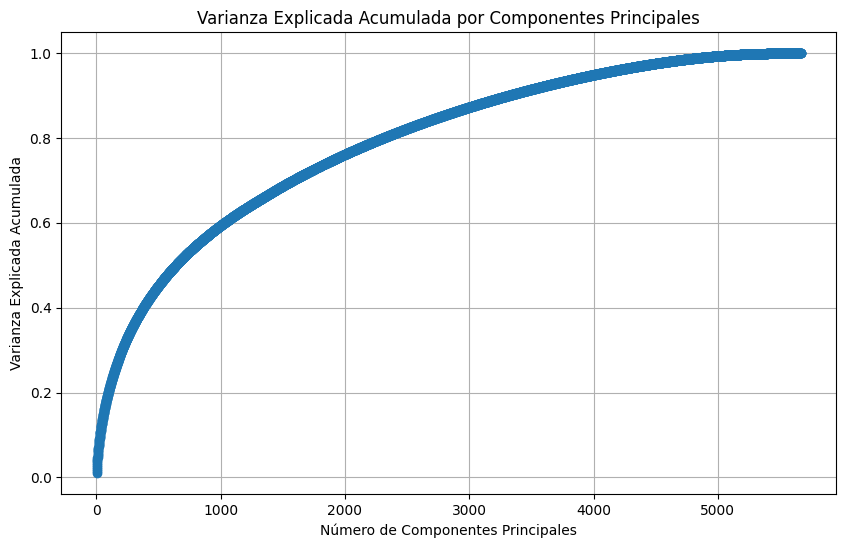

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

Vamos a quedarnos con 3000

In [44]:
pca = PCA(n_components=3000)
X_pca_3000 = pca.fit_transform(df_tfidf)
X_pca_3000

array([[-5.22539120e-03, -4.29118731e-02,  2.00006541e-02, ...,
        -3.46450333e-04, -7.00626692e-03,  9.99196742e-03],
       [ 2.67076827e-02, -5.57887506e-02,  6.07539965e-02, ...,
        -2.47554060e-02, -1.60842964e-03,  3.93753231e-03],
       [ 1.98738169e-02, -5.74165078e-02,  6.04747381e-03, ...,
        -2.35297568e-03, -1.03836626e-03,  1.22552726e-03],
       ...,
       [-4.34852446e-02, -3.32303565e-02, -1.53603013e-02, ...,
         1.07449167e-02, -5.35108698e-03,  1.25760819e-02],
       [-2.98260380e-02, -3.52940290e-02,  4.95011451e-03, ...,
        -3.33765753e-03, -1.02277821e-02, -5.65299168e-03],
       [-2.97737169e-02, -3.40359607e-02,  5.07223746e-03, ...,
         5.82284781e-05, -1.62606113e-04, -5.82804229e-05]])

In [48]:
df_pca_3000 = pd.DataFrame(X_pca_3000)

In [49]:
df['vectorized_reviews'] = df_pca_3000.values.tolist()

In [50]:
df.head(11)

,url,review_0,review_1,review_0_token,review_1_token,vectorized_reviews
0,/Restaurant_Review-g312741-d26322909-Reviews-C...,"Amazing, highly recommend this experience!!!!",Cooking with Johnathon,"[amazing, highly, recommend, experience]","[cooking, johnathon]","[-0.00522539120031596, -0.042911873086313536, ..."
1,/Restaurant_Review-g312741-d15325004-Reviews-F...,I took my wife and two grown up children for d...,A great evening.,"[took, wife, two, grown, child, dinner, fogon,...","[great, evening]","[0.026707682650064873, -0.055788750578903014, ..."
2,/Restaurant_Review-g312741-d8696562-Reviews-Ar...,We found the Argentine Experience to be exactl...,The ￹steak￻ was beyond delicious and the...,"[found, argentine, experience, exactly, argent...","[￹steak￻, beyond, delicious, ...]","[0.019873816882144235, -0.057416507811796705, ..."
3,/Restaurant_Review-g312741-d25279370-Reviews-F...,Experiencia Inmersiva Excelente,Amazing place great service,"[experiencia, inmersiva, excelente]","[amazing, place, great, service]","[0.13909703982734978, -0.017137741778103375, 0..."
4,/Restaurant_Review-g312741-d25198242-Reviews-I...,My husband had the cantelonni stuffed with ￹la...,Great food and ￹nice￻ food place,"[husband, cantelonni, stuffed, ￹lamb￻]","[great, food, ￹nice￻, food, place]","[0.22704926426223246, 0.024272715960256815, 0...."
5,/Restaurant_Review-g312741-d929310-Reviews-Mic...,Outstanding food and service!,Awesome,"[outstanding, food, service]",[awesome],"[0.07200154393881567, 0.02995040810400993, 0.0..."
6,/Restaurant_Review-g312741-d814198-Reviews-El_...,... the gnocchi and carbonara for ￹pasta￻ then...,"Aged ￹beef￻ in Argentina, who knew?","[..., gnocchi, carbonara, ￹pasta￻, night, spec...","[aged, ￹beef￻, argentina, knew]","[-0.016897181574260185, -0.053158391695624724,..."
7,/Restaurant_Review-g312741-d19101236-Reviews-H...,"... classic choripan, empanada and their incre...",We ate a Rib Eye and a Choripan (Chorizo...,"[..., classic, choripan, empanada, incredible,...","[ate, rib, eye, choripan, chorizo, ...]","[-0.02262563546715974, -0.03933704652627767, 0..."
8,/Restaurant_Review-g312741-d1926010-Reviews-Cu...,My wife and I enjoyed a delicious dinner at Cu...,An amazing experience,"[wife, enjoyed, delicious, dinner, cucina, ’, ...","[amazing, experience]","[0.01571976466700535, -0.060677836018707104, 0..."
9,/Restaurant_Review-g312741-d25170609-Reviews-H...,Great ￹steak￻ - far better than Don Julio,Amazing,"[great, ￹steak￻, far, better, julio]",[amazing],"[0.05493748155501686, -0.05352627667439041, 0...."


In [51]:
df.to_csv('data/vectorized_reviews.csv', index=False)